In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# let's set things up so we have nice font sizes
plt.rcParams.update({'font.size': 12})
from sympy import symbols, solve
from sympy import sympify
import pandas as pd

In [2]:
def plot(a,b,c,d,e,f,g,h,c1,c2,c3,c4):
    fig, ax = plt.subplots(nrows=1,ncols=1)
    # Plot the numerical solution
    ax.plot(a,b,color = c1)
    ax.plot(c,d,color = c2)
    ax.plot(e,f,color = c3)
    ax.plot(g,h,color = c4)
    # Make the plot attractive
    ax.set_xlabel('t') 
    ax.set_ylabel('p(t)') 
    ax.set_title('Delta Variant and Selection')
    ax.set_xlim([0,32])

In [3]:
def createArrays(s,k): 
        xArr = np.array(range(100))
        xArr = np.linspace(0, 32, 1000)
        yArr = (-k*np.exp(s*xArr)) / (1 - (k*np.exp(s*xArr)))
        return np.array(xArr), np.array(yArr)

In [4]:
a,b = createArrays(1,-1/99)
c,d = createArrays(1,-1/49)
e,f = createArrays(1,-1/24)
g,h = createArrays(1,-2/23)

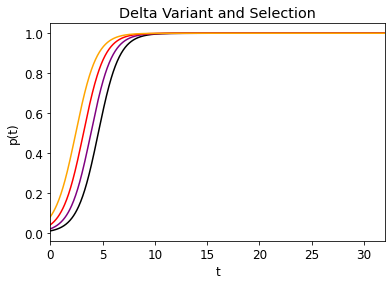

In [5]:
plot(a,b,c,d,e,f,g,h,"black","purple","red","orange")

In [6]:
a,b = createArrays(0.5,-1/49)
c,d = createArrays(1,-1/49)
e,f = createArrays(2,-1/49)
g,h = createArrays(4,-1/49)

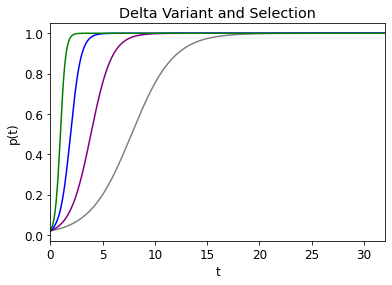

In [7]:
plot(a,b,c,d,e,f,g,h,"gray","purple","blue","green")

In [8]:
df = pd.read_csv (r'delta_data.csv')
print (df)

           Entity Code      Day  Delta  Week
0   United States  USA   2/8/21   0.01     0
1   United States  USA  2/22/21   0.01     2
2   United States  USA   3/8/21   0.01     4
3   United States  USA  3/22/21   0.01     6
4   United States  USA   4/5/21   0.05     8
5   United States  USA  4/19/21   0.31    10
6   United States  USA   5/3/21   1.23    12
7   United States  USA  5/17/21   2.47    14
8   United States  USA  5/31/21   6.83    16
9   United States  USA  6/14/21  24.46    18
10  United States  USA  6/28/21  54.29    20
11  United States  USA  7/12/21  81.33    22
12  United States  USA  7/26/21  93.33    24
13  United States  USA   8/9/21  97.32    26
14  United States  USA  8/23/21  99.08    28
15  United States  USA   9/6/21  99.49    30
16  United States  USA  9/20/21  99.06    32


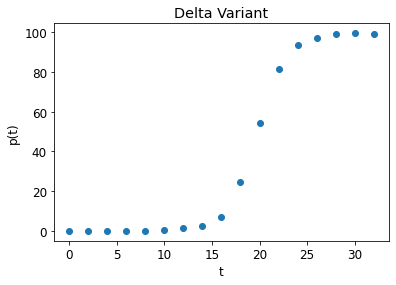

In [9]:
week = df["Week"]
delta = df["Delta"]
# Plot
plt.scatter(week, delta)
plt.title('Delta Variant')
plt.xlabel('t')
plt.ylabel('p(t)')
plt.show()

In [10]:
a,b = createArrays(0.6,-0.000001/.999999) #p0=0.000001
c,d = createArrays(1,-1/49)
e,f = createArrays(2,-1/49)
g,h = createArrays(4,-1/49)

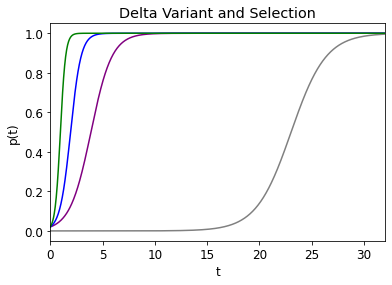

In [11]:
plot(a,b,c,d,e,f,g,h,"gray","purple","blue","green")

In [12]:
a,b = createArrays(0.7,-0.000001/.999999) #p0=0.000001
delta1 = delta/100

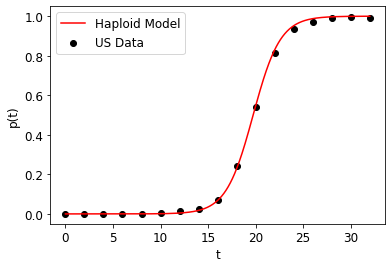

In [13]:
plt.figure()
ax = plt.axes()
ax.scatter(week,delta1,color="black",label="US Data")
ax.plot(a,b,color="red",label = "Haploid Model")
ax.legend(loc='best')
ax.set_xlabel('t')
ax.set_ylabel('p(t)')
plt.show()

In [14]:
uk = pd.read_csv (r'Ukdata.csv')
print (uk)

            Entity Code         Day   Delta  month  year  day  week
0   United Kingdom  GBR  2021-02-08  0.0002      2  2021    8     0
1   United Kingdom  GBR  2021-02-22  0.0001      2  2021   22     2
2   United Kingdom  GBR  2021-03-08  0.0001      3  2021    8     4
3   United Kingdom  GBR  2021-03-22  0.0001      3  2021   22     6
4   United Kingdom  GBR  2021-04-05  0.0009      4  2021    5     8
5   United Kingdom  GBR  2021-04-19  0.0160      4  2021   19    10
6   United Kingdom  GBR  2021-05-03  0.0915      5  2021    3    12
7   United Kingdom  GBR  2021-05-17  0.3361      5  2021   17    14
8   United Kingdom  GBR  2021-05-31  0.7325      5  2021   31    16
9   United Kingdom  GBR  2021-06-14  0.9034      6  2021   14    18
10  United Kingdom  GBR  2021-06-28  0.9810      6  2021   28    20
11  United Kingdom  GBR  2021-07-12  0.9928      7  2021   12    22
12  United Kingdom  GBR  2021-07-26  0.9968      7  2021   26    24
13  United Kingdom  GBR  2021-08-09  0.9973     

In [15]:
weekUk = uk["week"]
deltaUk = uk["Delta"]

In [16]:
p1,p2 = createArrays(0.77,-0.00001/.99999) #p0=0.00001

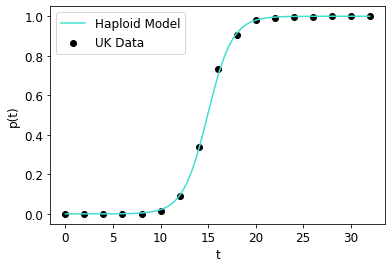

In [17]:
plt.figure()
ax = plt.axes()
ax.plot(p1,p2,color="turquoise",label = "Haploid Model")
ax.scatter(weekUk,deltaUk,color="black",label="UK Data")
ax.legend(loc='best')
ax.set_xlabel('t')
ax.set_ylabel('p(t)')
plt.show()

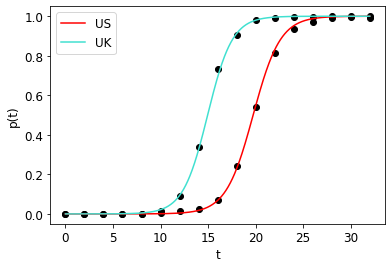

In [18]:
plt.figure()
ax = plt.axes()
ax.scatter(week,delta1,color="black")
ax.plot(a,b,color="red",label = "US")
ax.plot(p1,p2,color="turquoise",label = "UK")
ax.scatter(weekUk,deltaUk,color="black")
ax.legend(loc='best')
ax.set_xlabel('t')
ax.set_ylabel('p(t)')
plt.show()